In [6]:
import numpy as np
from numpy import genfromtxt

from open3d import *
import open3d as o3d

import math
import pptk

In [8]:
!ls ./temp

depths_csv   meshes       normals_csv  vertices_csv


In [9]:
points = genfromtxt('./temp/vertices_csv/frame_0_level_2.csv', delimiter=';')[:, :3]
normals = genfromtxt('./temp/normals_csv/frame_0_level_2.csv', delimiter=';')[:, :3]

In [10]:
print(points.shape, normals.shape)

(19200, 3)

In [12]:
points_no_inf = points[(points[:, 0] != -float("inf")) & (normals[:, 0] != -float("inf")), :]
normals_no_inf = normals[(points[:, 0] != -float("inf")) & (normals[:, 0] != -float("inf")), :]

In [13]:
normals_no_inf

array([[ 0.85346 , -0.406321, -0.326357],
       [ 0.92329 , -0.354174, -0.148648],
       [ 0.857918, -0.39642 , -0.326846],
       ...,
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ]])

In [14]:
points_no_inf

array([[-1.30376 , -0.874186,  2.25527 ],
       [-1.29934 , -0.882855,  2.27763 ],
       [-1.29896 , -0.894549,  2.30781 ],
       ...,
       [ 0.472465,  0.428936,  0.952185],
       [ 0.480402,  0.429547,  0.953539],
       [ 0.488294,  0.430098,  0.954764]])

In [17]:
print(points.shape, normals.shape)

(19200, 3) (19200, 3)


In [15]:
from mayavi.mlab import points3d, quiver3d, show

def displayPointsAndNormals(P, N):  
    x = P[:, 0]                        
    y = P[:, 1]                        
    z = P[:, 2]                        
    points3d(x, y, z, color=(0, 0, 0), scale_factor=0.025)                                                                                                  

    u = N[:, 0]                        
    v = N[:, 1]                        
    w = N[:, 2]                        
    quiver3d(x, y, z, u, v, w, color=(0.5, 0., 0), opacity=0.75, line_width=0.5, scale_factor=0.1)         
    show()

In [16]:
displayPointsAndNormals(points_no_inf[:,:], normals_no_inf[:, :])

In [57]:
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(points_no_inf)

In [58]:
# o3d.visualization.draw_geometries([pcd])

In [20]:
depth_unfiltered = genfromtxt('./temp/depths_csv/frame_0.csv', delimiter=';')
depth_filtered = genfromtxt('./temp/depths_csv/filtered_frame_0.csv', delimiter=';')

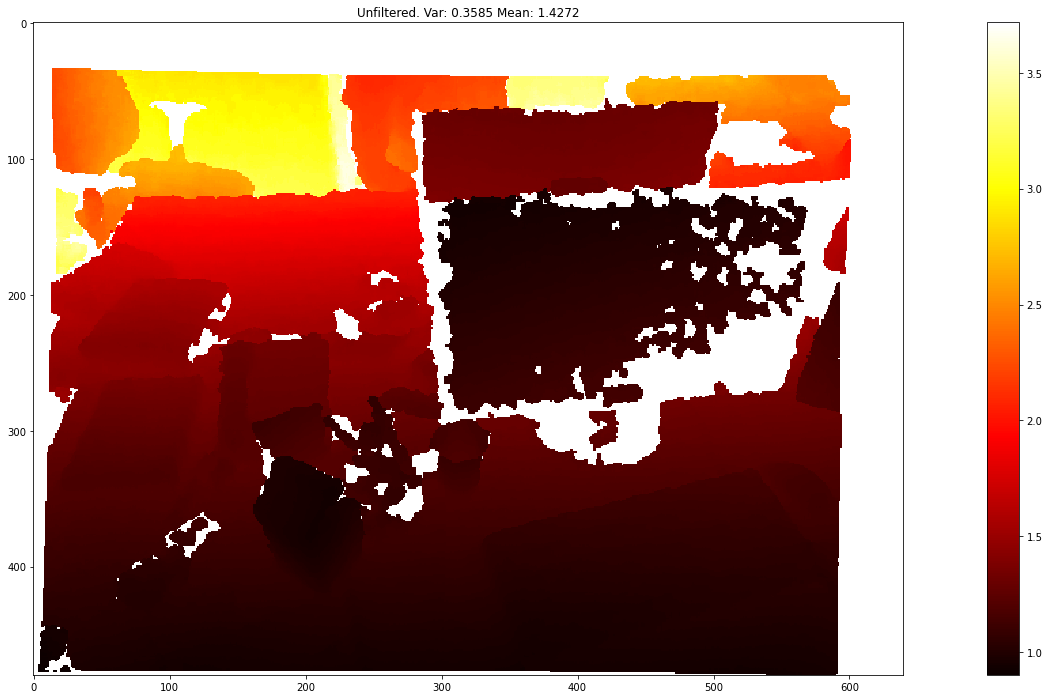

<Figure size 432x288 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(30, 12))
pos = plt.imshow(depth_unfiltered, cmap='hot', interpolation='none')
plt.title(f"Unfiltered. Var: {0.3585} Mean: {1.4272}")
plt.colorbar()
plt.show()
plt.savefig("./unfiltered_depth_image.png")

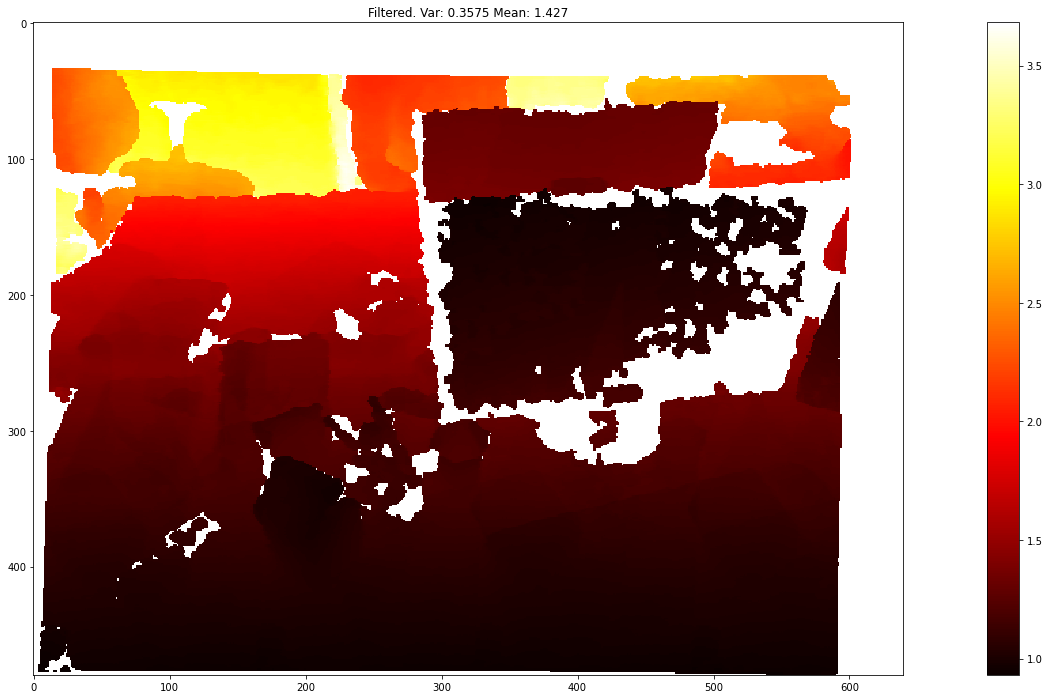

In [61]:
fig = plt.figure(figsize=(30, 12))
pos = plt.imshow(depth_filtered, cmap='hot', interpolation='none')
plt.title(f"Filtered. Var: {0.3575} Mean: {1.4276}")
plt.colorbar()
plt.show()
plt.savefig("./unfiltered_depth_image.png")

In [51]:
np.var(depth_filtered[depth_filtered])

/Users/russii/opt/anaconda3/envs/kinect_fusion/lib/python3.6/site-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


nan

In [55]:
depth_filtered_no_inf = depth_filtered[depth_filtered != -float("inf")]
depth_unfiltered_no_inf = depth_unfiltered[depth_unfiltered != -float("inf")]

In [65]:
np.var(depth_unfiltered_no_inf)

0.358582192615474

In [66]:
np.var(depth_filtered_no_inf)

0.35749480118350574